# KOH1: Podstawowa sieć Kohonena
Adrianna Grudzień

-> na 10 maja

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [1]:
# def initialize_weights(k, N, M):
#     weights = [np.random.rand(k,1) for i in range(N*M)]
#     return weights

# def d(w_array,x_array):
#     """Iloczyn skalarny (metryka)"""
#     return np.dot(w_array, x_array)
# def distance(n1, n2):
#     """Odległość między neuronami"""
#     return (n1[0]-n2[0]) + (n1[1]-n2[1])

# def alpha(t, lambdaa):
#     """Wygaszanie w czasie"""
#     return np.exp(-t/lambdaa)
# def gauss_fun(x,t):
#     """Funkcja Gaussa"""
#     return np.exp(-np.square(x*t))

# def theta(n1,n2,t):
#     """Waga sąsiedztwa wygaszana w czasie"""
#     return gauss_fun(distance(n1,n2),t)

In [8]:
class Koh:
    def __init__(self, k, N, M, theta_fun='gauss'):
        self.k = k
        self.N = N
        self.M = M
        self.theta_fun = theta_fun
        self._initialize_weights()
        self.positions = [[i,j] for i in range(self.N) for j in range(self.M)]
        
    def _initialize_weights(self):
        self.weights = [np.random.rand(1,self.k) for i in range(self.N*self.M)]
    
    @staticmethod
    def d(w_array,x_array):
        """Iloczyn skalarny (metryka)"""
        return np.dot(w_array, x_array)
    @staticmethod
    def distance(n1, n2):
        """Odległość między neuronami"""
        return (n1[0]-n2[0]) + (n1[1]-n2[1])

    def gauss_fun(self, x, t):
        """Funkcja Gaussa"""
        return np.exp(-np.square(x*t))
    def mexico_fun(self, x, t):
        """Meksykański kapelusz (-druga pochodna gauss_fun)"""
        return [(2-4*np.square(i))*np.exp(-np.square(i)) for i in x]
    def theta(self,n1,n2, t):
        """Waga sąsiedztwa wygaszana w czasie"""
        if self.theta_fun == 'gauss':
            return gauss_fun(Koh.distance(n1,n2), t)
        elif self.theta_fun == 'mexico':
            return mexico_fun(Koh.distance(n1,n2), t)
    
    def alpha(self, t):
        """Wygaszanie w czasie"""
        return np.exp(-t/self.n_epochs)
    
    
    def train(self, data=None, n_epochs=10):
        self.n_epochs = n_epochs
        
        np.random.shuffle(data)
        for t in range(n_epochs):
            for x in data:
                i_min, j_min = self.positions[np.argmin(Koh.distance(self.weights, x))]
                for neuron_num in range(len(self.positions)):
                    self.weights[neuron_num] += self.theta([i_min,j_min],self.positions[neuron_num],t)*self.alpha(t)*(x - self.weights[neuron_num])
                    

## `Hexagon`

          x         y  c
0  2.402047  3.728695  1
1 -0.660032  7.047206  0
2  2.202839 -2.394303  2
3  3.179183  2.593885  1
4  3.173320 -2.152688  2


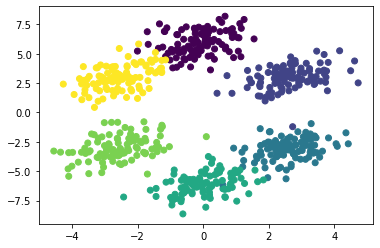

In [60]:
hexagon = pd.read_csv("mio2/hexagon.csv")
print(hexagon.head())
plt.scatter(hexagon.x, hexagon.y, c=hexagon.c)
plt.show()

In [79]:
data = np.array(hexagon[['x','y']])

In [162]:
# k - wymiar danych (liczba kolumn)
koh = Koh(k=2, N=4, M=2)
koh.train(data=data)

## `Cube`

          x         y         z  c
0  0.187781  0.239537  0.382492  0
1 -1.308979 -0.143321 -0.966648  0
2 -0.987613  0.679918 -0.037552  0
3  0.924980  0.607235 -0.146856  0
4 -0.098663  0.004329 -0.588876  0


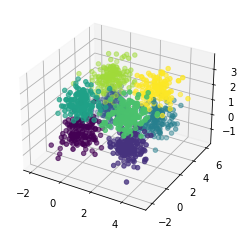

In [173]:
cube = pd.read_csv("mio2/cube.csv")
print(cube.head())

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cube.x, cube.y, cube.z, c=cube.c)
plt.show()

In [174]:
koh_c = Koh(k=3, N=4, M=2)
koh.train(data=np.array(cube[['x','y','z']]))

ValueError: operands could not be broadcast together with shapes (3,) (1,2) 

In [175]:
# opracować analogiczną funkcję

def get_nearest_cluster(self, point):
        """ Retrieves the closest cluster of a point. """

        # Initially the result is set to the first neuron.
        nearest_cluster = self._clusters[0]
        best_distance = distance.euclidian(self._clusters[0], point)

        # We look for a closer neuron in the neuron list.
        for i in xrange(1, len(self._clusters)):
            tmp_distance = distance.euclidian(self._clusters[i], point)
            if tmp_distance < best_distance:
                nearest_cluster = self._clusters[i]
                best_distance = tmp_distance

        return nearest_cluster